In [2]:
import rasterio

import os
import numpy as np
import glob
import csv
import cv2

In [4]:
cities = os.listdir('../datasets/onera/train_labels/')
cities.sort()
input_size = 64

In [5]:
total_change = 0
total_nochange = 0
train = []
for city in cities[:10]:
    print (city)
    d = cv2.imread('../datasets/onera/train_labels/' + city + '/cm/' + 'cm.png', 0) / 255
#     print (city, np.unique(d))
#   total_change += np.sum(d)
#   total_pixels += r.shape[0] * r.shape[1]
#     print (d.shape)
    for i in range(0, d.shape[0], input_size//2):
        for j in range(0, d.shape[1], input_size//2):
            if i + input_size < d.shape[0] and j + input_size < d.shape[1] and \
                    np.sum(d[i:i+input_size, j:j+input_size]) >= 1:
                train.append([city, i, j])
                change = np.sum(d[i:i+input_size, j:j+input_size])
                total_change += change
                total_nochange += (input_size * input_size - change)
print (total_change, total_nochange)

test = []
for city in cities[10:]:
    print (city)
    r = rasterio.open('../datasets/onera/train_labels/' + city + '/cm/' + city + '-cm.tif')
    for i in range(0, r.shape[0], input_size):
        for j in range(0, r.shape[1], input_size):
            if i + input_size < r.shape[0] and j + input_size < r.shape[1] and \
            np.sum(d[i:i+input_size, j:j+input_size]) >= 1:
                test.append([city, i, j])

abudhabi
aguasclaras
beihai
beirut
bercy
bordeaux
cupertino
hongkong
mumbai
nantes
460960.0 8709984.0
paris
pisa
rennes
saclay_e


/usr/local/lib/python3.5/dist-packages/rasterio/__init__.py:217: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


In [6]:
len(train), len(test)

(2239, 107)

In [7]:
fout = open('../datasets/onera/train.csv', 'w')
w = csv.writer(fout)
for t in train:
    w.writerow(t)
fout.close()

fout = open('../datasets/onera/test.csv', 'w')
w = csv.writer(fout)
for t in test:
    w.writerow(t)
fout.close()

In [2]:
from utils.dataloaders import full_onera_loader

In [3]:
all_bands = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12']
bands_max = {}
bmax = [5089.,  28000.,  28000.,  28000.,  26901.,  28000.,  25591.,
        28000.,  26305.,   5412.,    158.,  25104.,  19940.]
for i in range(len(all_bands)):
    bands_max[all_bands[i]] = bmax[i]
dataset = full_onera_loader('../datasets/onera/', ['B02', 'B03', 'B04', 'B08'], None, None, bands_max)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

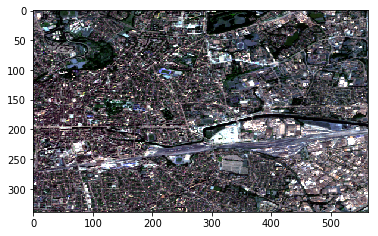

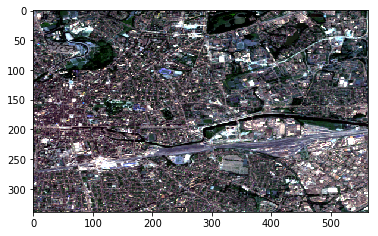

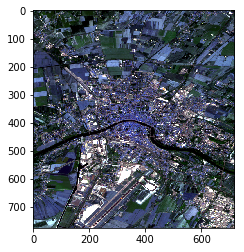

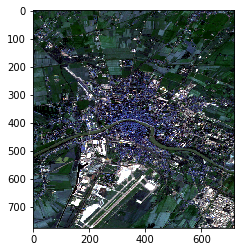

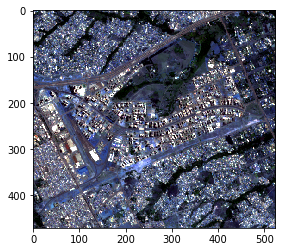

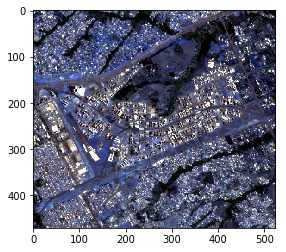

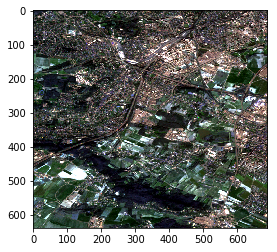

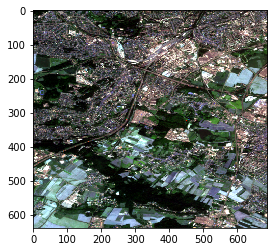

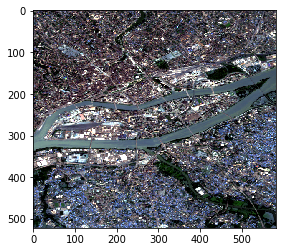

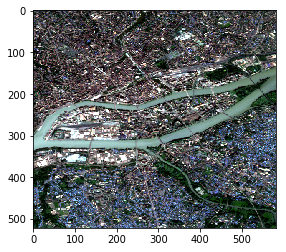

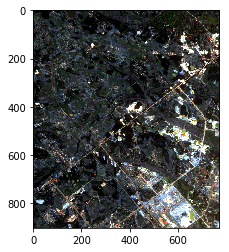

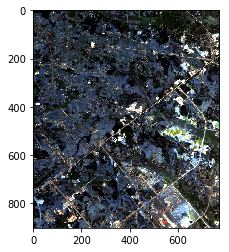

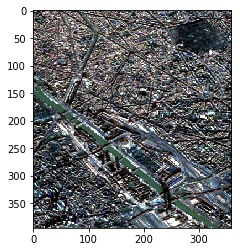

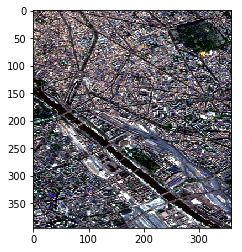

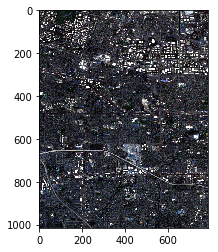

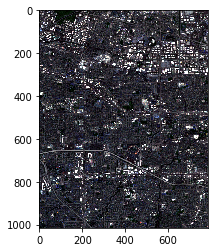

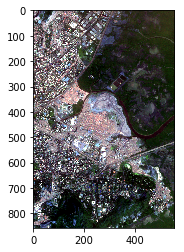

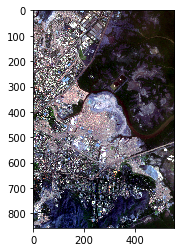

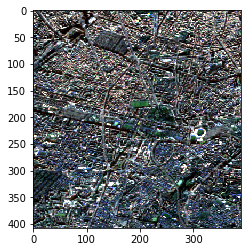

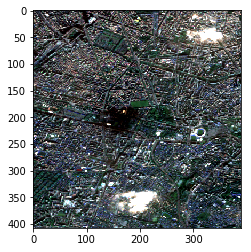

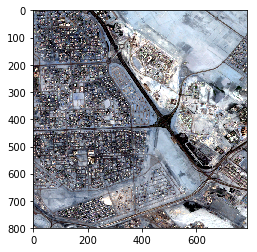

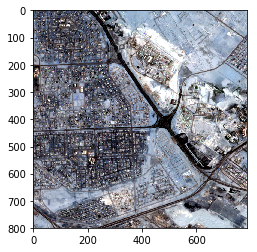

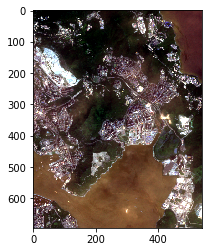

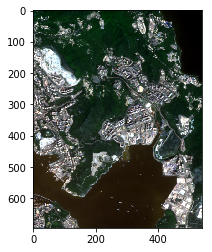

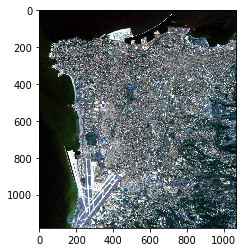

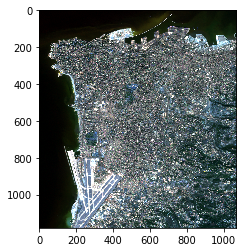

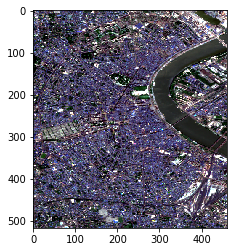

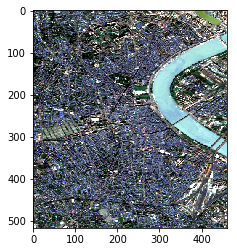

In [5]:
for city in dataset.keys():
    bands = dataset[city]['images']
    rgb1 = cv2.merge([bands[0], bands[2], bands[4]])
    rgb2 = cv2.merge([bands[1], bands[3], bands[5]])
    plt.imshow((rgb1 * 255).astype(np.uint8))
    plt.show()
    plt.imshow((rgb2 * 255).astype(np.uint8))
    plt.show()

(13, 13035156)

array([  269.31314087,   414.13943481,   536.9800415 ,   764.6965332 ,
         711.48406982,   745.4911499 ,   831.77252197,   865.61376953,
         902.31213379,   318.97601318,     8.65729427,  1007.27667236,
         860.51831055], dtype=float32)

array([  0, 255], dtype=uint8)

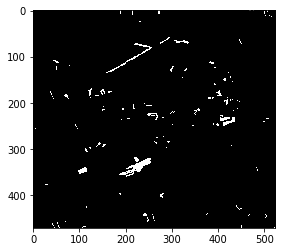

In [33]:
plt.imshow(img)

In [23]:
r = rasterio.open('../datasets/onera/train_labels/aguasclaras/cm/aguasclaras-cm.tif')
d = r.read()[0]

/usr/local/lib/python3.5/dist-packages/rasterio/__init__.py:217: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


In [28]:
d = d - 1

In [29]:
cv2.imwrite('../datasets/onera/train_labels/aguasclaras/cm/cm.png', d * 255)

True